In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from logic.factory_manage.make_df import read_csv_hannnyuu
from utils.font import set_jp_font
import re
set_jp_font()

✅ 日本語フォントを設定しました: Noto Sans CJK JP


## 元データ情報

In [2]:
# Read the CSV file
path_2020 = "/work/app/data/input/2020顧客.csv"
path_2021 = "/work/app/data/input/2021顧客.csv"
path_2022 = "/work/app/data/input/2022顧客.csv"
path_2023 = "/work/app/data/input/2023_all.csv"
path_2024 = "/work/app/data/input/20240501-20250422.csv"

df_2021 = pd.read_csv(path_2021, encoding="utf-8")
df_2022 = pd.read_csv(path_2022, encoding="utf-8")
df_2023 = pd.read_csv(path_2023, encoding="utf-8")
df_2024 = pd.read_csv(path_2024, encoding="utf-8")


/tmp/ipykernel_623795/788235423.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(path_2023, encoding="utf-8")


### データ整理

In [3]:
def remove_parenthesis_weekday(date_str):
    # 「(」から「)」までの部分を削除
    return re.sub(r"\([^)]+\)", "", date_str)

df_2024["伝票日付"]= df_2024["伝票日付"].apply(remove_parenthesis_weekday)
df_2024.head()

,伝票日付,売上日付,支払日付,業者CD,業者名,伝票区分CD,伝票区分名,品名CD,品名,正味重量,数量,単位CD,単位名,単価,金額,受入番号,集計項目CD,集計項目
0,2024/05/01,2024/05/01(水),2024/05/01(水),26,ｼｰﾒﾝｽﾍﾙｽｹｱ,1,売上,1,混合廃棄物A,1620.0,1620.0,3,kg,60.0,97200,7643,5.0,E
1,2024/05/01,2024/05/01(水),2024/05/01(水),26,ｼｰﾒﾝｽﾍﾙｽｹｱ,1,売上,1,混合廃棄物A,1840.0,1840.0,3,kg,60.0,110400,7747,5.0,E
2,2024/05/01,2024/05/01(水),2024/05/01(水),38,中村鐵工所,1,売上,1,混合廃棄物A,1730.0,9.0,2,m3,0.0,0,7724,4.0,D
3,2024/05/01,2024/05/01(水),2024/05/01(水),63,鈴亀,1,売上,2,混合廃棄物B,2000.0,2000.0,3,kg,70.0,140000,7814,5.0,E
4,2024/05/01,2024/05/01(水),2024/05/01(水),64,ﾃﾞﾙｴﾌ（ﾗｲﾌﾞｶﾞｰﾃﾞﾝｸﾞﾙｰﾌﾟ用）,1,売上,1,混合廃棄物A,360.0,360.0,3,kg,65.0,23400,7812,4.0,D


In [4]:
# 各ファイルのカラムを確認
for df, name in zip([df_2021, df_2022, df_2023, df_2024], ["2021", "2022", "2023", "2024"]):
    print(f"{name}: {df.columns.tolist()}")

# 件数確認
for df, name in zip([df_2021, df_2022, df_2023, df_2024], ["2021", "2022", "2023", "2024"]):
    print(f"{name}: {len(df)}件")


2021: ['重複', '番号', '種類', '顧客重複', '得意先', '排出事業者', '正味重量', '計量時刻_総重量', '計量時刻_空車重量', '搬入場所', '商品', '得意先商品', '商品種類', '正味重量_明細', '単位', '単価', '金額', 'Unnamed: 17', '伝票日付', '曜日']
2022: ['重複', '番号', '種類', '顧客重複', '得意先', '排出事業者', '正味重量', '計量時刻_総重量', '計量時刻_空車重量', '搬入場所', '商品', '得意先商品', '商品種類', '正味重量_明細', '単位', '単価', '金額', 'Unnamed: 17', '伝票日付', '曜日']
2023: ['伝票日付', '計量場所コード', '計量場所', '売上仕入区分コード', '売上仕入区分', '伝票区分コード', '伝票区分', '交付番号', '車両区分コード', '車両区分', '重複', '得意先', '種類', '現場', '排出事業者コード', '排出事業者', '排出事業場コード', '排出事業場', '運搬受託者コード', '運搬受託者', '処分事業者コード', '処分受託者', '処分事業場コード', '処分事業場', '総重量', '空車重量', '調整重量', '正味重量', '先方計量重量', '見た目数量', '計量時刻_総重量', '計量時刻_空車重量', '計量場所コード1', '計量場所1', '車両番号', '車両種別', '運搬担当者', '営業担当者コード', '営業担当者', '事務担当者コード', '事務担当者', '売上額', '売上税額', '仕入額', '仕入税額', '集計_t', '集計_kg', '集計_m3', '備考', '商品種別コード', '商品種別', '商品コード', '商品', '数量', '単位コード', '単位', '単価', '金額', '集計区分コード', '集計区分', '単価_計算用', '金額_計算用', '税額', '総重量_明細', '空車重量_明細', '正味重量_明細', 'スケール比率', 'スケール', '備考_得意先', '備考_社内', 'パラメータ_開始日', 'パラメータ

In [5]:
df_2021.head()

,重複,番号,種類,顧客重複,得意先,排出事業者,正味重量,計量時刻_総重量,計量時刻_空車重量,搬入場所,商品,得意先商品,商品種類,正味重量_明細,単位,単価,金額,Unnamed: 17,伝票日付,曜日
0,1,1.0,A,1,a,株式会社 キャプティ,1440,7:23,16:13,第二,室内機,株式会社 キャプティ 【リニューアル第2グループ④】室内機,建設室内機44200,200,kg,55.0,11000,建設44200,2021/1/4,月曜日
1,2,1.0,A,2,a,株式会社 キャプティ,1440,7:23,16:13,第二,混合廃棄物A,株式会社 キャプティ 【リニューアル第2グループ④】混合廃棄物A,建設混合廃棄物A44200,290,kg,65.0,18850,建設44200,2021/1/4,月曜日
2,3,1.0,A,3,a,株式会社 キャプティ,1440,7:23,16:13,第二,室外機,株式会社 キャプティ 【リニューアル第2グループ④】室外機,建設室外機44200,980,kg,10.0,9500,建設44200,2021/1/4,月曜日
3,1,2.0,B,1,b,お茶ノ水茗渓通り会会長瀬川昌輝,920,7:01,7:03,第二,混合廃棄物A,東日本ハイウェイ 株式会社混合廃棄物A,袋ゴミ混合廃棄物A44201,920,kg,65.0,59800,袋ゴミ44201,2021/1/5,火曜日
4,1,4.0,D,1,g,株式会社 大京穴吹不動産 飯田橋店,870,7:01,7:11,第二,混合廃棄物A,株式会社 あるくる混合廃棄物A,みなし混合廃棄物A44201,310,kg,55.0,17050,みなし44201,2021/1/5,火曜日


In [6]:
# 2021・2022：単純マッピング
df_2021_reduced = df_2021[["伝票日付", "正味重量", "金額"]].copy()
df_2022_reduced = df_2022[["伝票日付", "正味重量", "金額"]].copy()

# 2023：金額系が少し違う
df_2023_reduced = df_2023[["伝票日付", "正味重量", "金額"]].copy()

# 2024：金額カラム名も違う
df_2024_reduced = df_2024[["伝票日付", "正味重量", "金額"]].copy()
df_2024_reduced.head()



,伝票日付,正味重量,金額
0,2024/05/01,1620.0,97200
1,2024/05/01,1840.0,110400
2,2024/05/01,1730.0,0
3,2024/05/01,2000.0,140000
4,2024/05/01,360.0,23400


In [7]:
df_2021_reduced["年度"] = 2021
df_2022_reduced["年度"] = 2022
df_2023_reduced["年度"] = 2023
df_2024_reduced["年度"] = 2024

df_all = pd.concat([
    df_2021_reduced,
    df_2022_reduced,
    df_2023_reduced,
    df_2024_reduced
], ignore_index=True)

# 日付型変換（必要に応じて）
df_all["伝票日付"] = pd.to_datetime(df_all["伝票日付"], errors="coerce")


In [8]:
df_all["年月"] = df_all["伝票日付"].dt.to_period("M")

# 年月が2025年の行は年度も2025に統一
mask_2025 = df_all["年月"].astype(str).str.startswith("2025-")
df_all.loc[mask_2025, "年度"] = 2025

summary = df_all.groupby(["年度", "年月"]).agg({
    "正味重量": "sum",
    "金額": "sum"
}).reset_index()

print(summary)


      年度       年月       正味重量         金額
0   2021  2021-01  3371840.0  125976310
1   2021  2021-02  3368020.0  124736550
2   2021  2021-03  4167490.0  158899990
3   2021  2021-04  3689430.0  139181645
4   2021  2021-05  2906870.0  115010325
5   2021  2021-06  3156030.0  130206665
6   2021  2021-07  3178040.0  130352640
7   2021  2021-08  3138260.0  125282545
8   2021  2021-09  3369080.0  128697665
9   2021  2021-10  3477380.0  134146725
10  2021  2021-11  3431680.0  133889850
11  2021  2021-12  4011720.0  152200630
12  2022  2022-01  3195280.0  118424235
13  2023  2023-01  2716020.0  106942115
14  2023  2023-02  3060460.0  116730595
15  2023  2023-03  4652090.0  179145710
16  2023  2023-04  3410770.0  132905553
17  2023  2023-05  3328230.0  124031280
18  2023  2023-06  3390630.0  131390505
19  2023  2023-07  3477900.0  134076729
20  2023  2023-08  3338620.0  128211570
21  2023  2023-09  3217470.0  124210105
22  2023  2023-10  3546560.0  137907450
23  2023  2023-11  3389450.0  131634241


## データの確認


### 1件当たりの重量

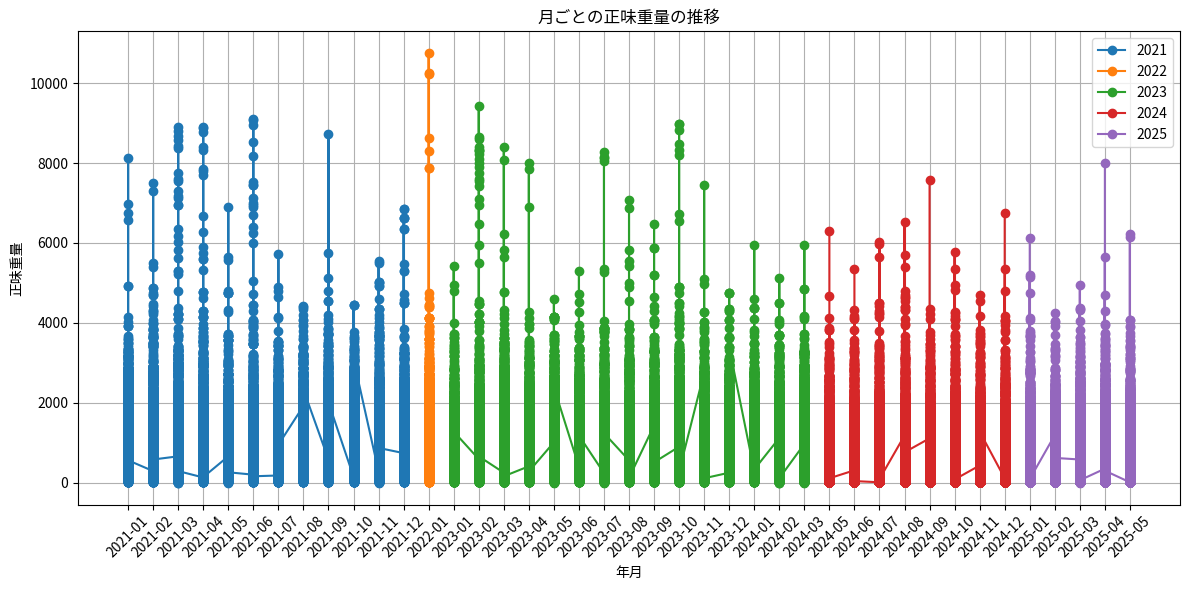

In [9]:
import matplotlib.pyplot as plt

# 年月順に並び替え
df_all_sorted = df_all.sort_values("年月")

# プロット
plt.figure(figsize=(12, 6))

for year in sorted(df_all["年度"].unique()):
    temp = df_all_sorted[df_all_sorted["年度"] == year]
    plt.plot(temp["年月"].astype(str), temp["正味重量"], marker='o', label=f"{year}")

plt.title("月ごとの正味重量の推移")
plt.xlabel("年月")
plt.ylabel("正味重量")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


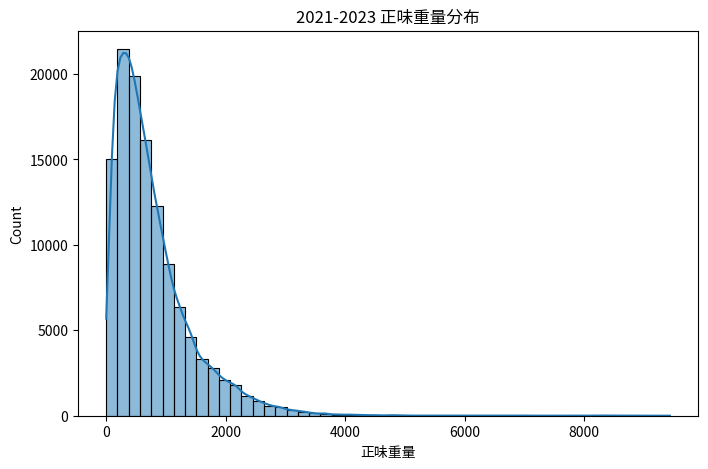

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_all[df_all["年度"].isin([2021,2023])]["正味重量"], bins=50, kde=True)
plt.title("2021-2023 正味重量分布")
plt.show()

In [11]:
df_all.groupby("年度")["正味重量"].describe()

,count,mean,std,min,25%,50%,75%,max
年度,,,,,,,,
2021,51604.0,799.663592,690.879007,0.0,330.0,610.0,1050.0,9110.0
2022,3934.0,812.221657,763.259664,10.0,320.0,600.0,1040.0,10760.0
2023,67420.0,760.649956,658.862056,0.0,300.0,590.0,1020.0,9430.0
2024,34532.0,509.664369,577.750674,10.0,110.0,320.0,700.0,7570.0
2025,21215.0,529.141645,584.688686,-10.0,120.0,330.0,740.0,8000.0


### 上位10

In [20]:
import pandas as pd

# pandasの出力設定（省略されないように）
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)



print("=== 2024年 ===")
top_2024 = df_2024.nlargest(10, '正味重量')
top_2024 = top_2024[["伝票日付", "正味重量", "業者名", "品名"]]



=== 2024年 ===


In [21]:
top_2024

,伝票日付,正味重量,業者名,品名
54851,2025/04/16,8000.0,協和機電工業東京支店,混合廃棄物（ﾌﾗｲﾄ）
22234,2024/09/26,7570.0,ﾄﾏｯｸ,ｱｽﾌｧﾙﾄがら
36328,2024/12/21,6750.0,藤木工務店東京支店,ﾀｲﾙｶｰﾍﾟｯﾄ
17677,2024/08/28,6530.0,日本通運,GC 軽鉄･ｽﾁｰﾙ類
3198,2024/05/24,6310.0,ﾒﾀｳｫｰﾀｰ,混合廃棄物（がれき）
59633,2025/05/19,6220.0,藤木工務店東京支店,本畳
57230,2025/05/01,6160.0,協和機電工業東京支店,混合廃棄物（ﾌﾗｲﾄ）
40600,2025/01/23,6120.0,家島建設,がれき類
9445,2024/07/03,6030.0,ｷﾀｻﾞﾜ引越ｾﾝﾀｰ,混合廃棄物B
12440,2024/07/24,5980.0,三機工業（明石町）,混合廃棄物(処理困難物)


In [24]:
top_2021 = df_2021.nlargest(10, '正味重量')
top_2021 = top_2021[["伝票日付", "正味重量", "排出事業者", "商品"]]
top_2021

,伝票日付,正味重量,排出事業者,商品
23905,2021/6/19,9110,コーナン建設株式会社,その他
21902,2021/6/4,9090,メタウォーター株式会社,混合廃棄物（処理困難物）
23051,2021/6/14,8960,メタウォーター株式会社,その他
16090,2021/4/21,8910,メタウォーター株式会社,混合廃棄物（処理困難物）
12042,2021/3/25,8900,メタウォーター株式会社,混合廃棄物（処理困難物）
16091,2021/4/21,8880,メタウォーター株式会社,混合廃棄物（処理困難物）
11631,2021/3/23,8800,テクニカ創建株式会社,その他
16082,2021/4/21,8790,メタウォーター株式会社,混合廃棄物（処理困難物）
34264,2021/9/6,8740,宇都宮工業株式会社,混合廃棄物（がれき類）
10646,2021/3/17,8680,メタウォーター株式会社,その他


In [29]:
min_2024= df_2023.nsmallest(10, '正味重量')
# min_2023 = min_2023[["伝票日付", "正味重量", "排出事業者", "商品"]]
min_2024


,伝票日付,計量場所コード,計量場所,売上仕入区分コード,売上仕入区分,伝票区分コード,伝票区分,交付番号,車両区分コード,車両区分,重複,得意先,種類,現場,排出事業者コード,排出事業者,排出事業場コード,排出事業場,運搬受託者コード,運搬受託者,処分事業者コード,処分受託者,処分事業場コード,処分事業場,総重量,空車重量,調整重量,正味重量,先方計量重量,見た目数量,計量時刻_総重量,計量時刻_空車重量,計量場所コード1,計量場所1,車両番号,車両種別,運搬担当者,営業担当者コード,営業担当者,事務担当者コード,事務担当者,売上額,売上税額,仕入額,仕入税額,集計_t,集計_kg,集計_m3,備考,商品種別コード,商品種別,商品コード,商品,数量,単位コード,単位,単価,金額,集計区分コード,集計区分,単価_計算用,金額_計算用,税額,総重量_明細,空車重量_明細,正味重量_明細,スケール比率,スケール,備考_得意先,備考_社内,パラメータ_開始日,パラメータ_終了日,パラメータ_売上仕入区分,パラメータ_車両区分,パラメータ_伝票区分,パラメータ_事務担当者,パラメータ_会社名称,パラメータ_計量場所名称,数量_ton,数量_kg,数量_m3,金額_掛,金額_現金,税額_掛,税額_現金
21860,2023/5/30,4,第一工場,0,売上,0,掛,0,1,持込,7,日本管材センター 株式会社,6.0,NaN,0,,0,NaN,0,NaN,1,株式会社オネスト,1,新木場リサイクル工場,0,0,0,0,0,0,NaN,NaN,4,第一工場,NaN,NaN,NaN,8,渡辺,0,NaN,2500,250,0,0,0,0,0.0,NaN,9998,その他,99980006,マニフェスト,50.0,10,枚,50.0,2500,2,処分費,50.0,2500,250,0,0,0,0,0,NaN,NaN,2023/5/1 0:00,2023/5/31 0:00,NaN,持込,NaN,NaN,株式会社 オネスト,NaN,0,0,0.0,2500,0,250,0
27859,2023/7/10,6,事務所用,0,売上,0,掛,0,1,持込,8,日本管材センター 株式会社,6.0,NaN,0,,0,NaN,0,NaN,1,株式会社オネスト,1,新木場リサイクル工場,0,0,0,0,0,0,NaN,NaN,6,事務所用,NaN,NaN,NaN,8,渡辺,0,NaN,2500,250,0,0,0,0,0.0,NaN,9998,その他,99980006,マニフェスト,50.0,10,枚,50.0,2500,2,処分費,50.0,2500,250,0,0,0,0,0,NaN,NaN,45108,45138,NaN,持込,NaN,NaN,株式会社 オネスト,NaN,0,0,0.0,2500,0,250,0
58328,2024/2/3,6,事務所用,0,売上,1,現金,0,1,持込,59,株式会社 友進,5.0,NaN,0,,0,NaN,404300,株式会社 友進,1,株式会社オネスト,1,新木場リサイクル工場,0,0,0,0,0,0,NaN,NaN,6,事務所用,NaN,NaN,NaN,8,渡辺,0,NaN,100,10,0,0,0,0,0.0,NaN,9998,その他,99980006,マニフェスト,2.0,10,枚,50.0,100,2,処分費,50.0,100,10,0,0,0,0,0,NaN,NaN,2024/2/1 0:00,2024/2/29 0:00,NaN,持込,NaN,NaN,株式会社 オネスト,NaN,0,0,0.0,0,100,0,10
58526,2024/2/5,6,事務所用,0,売上,1,現金,0,1,持込,4,株式会社 ミトモコーポレーション,4.0,NaN,160900,株式会社ミトモコーポレーション,1,同 左,160900,株式会社 ミトモコーポレーション,1,株式会社オネスト,1,新木場リサイクル工場,0,0,0,0,0,0,NaN,NaN,6,事務所用,NaN,NaN,NaN,51,小林,0,NaN,250,25,0,0,0,0,0.0,NaN,9998,その他,99980006,マニフェスト,5.0,10,枚,50.0,250,2,処分費,50.0,250,25,0,0,0,0,0,NaN,NaN,2024/2/1 0:00,2024/2/29 0:00,NaN,持込,NaN,NaN,株式会社 オネスト,NaN,0,0,0.0,0,250,0,25
66914,2024/3/28,6,事務所用,0,売上,1,現金,0,1,持込,284,株式会社 サントラスト,5.0,NaN,2697,株式会社 サントラスト,1,同 左,2697,株式会社 サントラスト,1,株式会社オネスト,1,新木場リサイクル工場,0,0,0,0,0,0,NaN,NaN,6,事務所用,NaN,NaN,NaN,37,サンテクノ,37,サンテクノ,350,35,0,0,0,0,0.0,NaN,9998,その他,99980006,マニフェスト,7.0,10,枚,50.0,350,2,処分費,50.0,350,35,0,0,0,0,0,NaN,NaN,2024/3/1 0:00,2024/3/31 0:00,NaN,持込,NaN,NaN,株式会社 オネスト,NaN,0,0,0.0,0,350,0,35
81,2023/1/5,6,事務所用,0,売上,0,掛,37336369766,1,持込,1,株式会社 エコック,2.0,NaN,890275,東京都中央卸売市場葛西市場葛西市場自治会,1,同 左,201200,株式会社 エコック,1,株式会社オネスト,1,新木場リサイクル工場,6290,6280,0,10,0,0,10:46:00,10:46:00,6,事務所用,8360.0,パッカー,NaN,35,川部,13,安藤（加）,650,65,0,0,0,10,0.0,NaN,2100,混合廃棄物,21000023,混合廃棄物A,10.0,2,kg,65.0,650,2,処分費,65.0,650,65,6290,6280,10,0,0,NaN,NaN,2023/1/1 0:00,2023/1/31 0:00,NaN,持込,NaN,NaN,株式会社 オネスト,NaN,0,10,0.0,650,0,65,0
637,2023/1/10,6,事務所用,0,売上,0,掛,0,1,持込,7,メタウォーター株式会社,1.0,NaN,972480,メタウォーター株式会社 さいたま営業所,106,022大委第2号大久保浄水場電気計装設備等点検業務委託,1,株式会社オネスト,1,株式会社オネスト,1,新木場リサイクル工場,5940,5930,0,10,0,0,15:36:00,15:36:00,6,事務所用,9920.0,４ｔユニック,,26,メタウォーター,26,メタウォーター,300,30,0,0,0,10,0.0,運搬：㈱ｵﾈｽﾄ／山内,2100,混合廃棄物,21000005,混合廃棄物,10.0,2,kg,30.0,300,2,処分費,30.0,300,30,5940,5930,10,0,0,NaN,NaN,2023/1/1 0:00,2023/1/31 0:00,NaN,持込,NaN,NaN,株式会社 オネスト,NaN,0,10,0.0,300,0,30,0
653,2023/1/10,6,事務所用,0,売上,0,掛,0,1,持込,47,株式会社 泉土木,1.0,NaN,970160,ＴＭＥＳ株式会社,25,銀座VELVIA館,2900,株式会社 泉土木,1,株式会社オネスト,1,新木場リサイクル工場,4310,4300,0,10,0,0,17:18:00,17:18:00,6,事務所用,7704.0,ダンプ,NaN,7,矢作,7,矢作,550,55,0,0,0,10,0.0,NaN,2100,混合廃棄物,21000023,混合廃棄物A,10.0,2,kg,55.0,550,2,処分費,55.0,550,55,4310,4300,10,0,0,NaN,NaN,2023/1/1 0:00,2023/1/31 0:00,NaN,持込,NaN,NaN,株式会社 オネスト,NaN,0,10,0.0,550,0,55,0
862,2023/1/12,6,事務所用,0,売上,0,掛,21659108380,1,持込,5,株式会社 テイソウ物流サービス,3.0,NaN,980671,株式会社 三栄収納サービス,3,株式会社三栄収納サービス,18031,株式会社 テイソウ物流サービス,1,株式会社オネスト,1,新木場リサイクル工場,2020,2010,0,10,0,0,10:22:00,10:23:00,6,事務所用,8933.0,その他,NaN,6,渡辺（安藤）,6,渡辺（安藤）,650,65,0,0,0,10,0.0,NaN,2100,混合廃棄物,21000023,混合廃棄物A,10.0,2,kg,65.0,650,2,処分費,65.0,650,65,2020,2010,10,0,0,NaN,NaN,2023/1/1 0:00,2023/1/31 0:00,NaN,持込,NaN,NaN,株式会社 オネスト,NaN,0,10,0.0,650,0,65,0
1090,2023/1/13,6,事務所用,0,売上,0,掛,26068409205,1,持込,1,株式会社 国際エキスプレス,1.0